In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cantera as ct

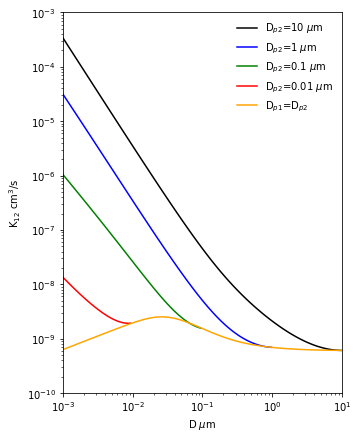

In [3]:
def K12(Dp1, Dp2):
    
    T  = 298.15               # for comparing to Seinfeld Fig. 13.5
    ρs = 1000
    kb = 1.38064852E-23
    λ  = 0.0686E-6
    μ  = 1.83E-5
    
    m1 = np.pi/6 * Dp1**3 * ρs
    m2 = np.pi/6 * Dp2**3 * ρs
    c1 = np.sqrt(8*kb*T/np.pi/m1)
    c2 = np.sqrt(8*kb*T/np.pi/m2)
    Kn1 = 2*λ/Dp1
    Kn2 = 2*λ/Dp2
    Cc1 = 1 + Kn1*(1.257 + 0.4*np.exp(-1.1/Kn1))
    Cc2 = 1 + Kn2*(1.257 + 0.4*np.exp(-1.1/Kn2))
    D1  = kb*T*Cc1/(3*np.pi*μ*Dp1)
    D2  = kb*T*Cc2/(3*np.pi*μ*Dp2)
    l1  = 8*D1/np.pi/c1
    l2  = 8*D2/np.pi/c2
    g1  = np.sqrt(2)/3/Dp1/l1*((Dp1+l1)**3 - (Dp1**2+l1**2)**1.5) - np.sqrt(2)*Dp1   # note, Seinfeld Table 13.1 is missing the second root 2, needed for Fig. 13.5
    g2  = np.sqrt(2)/3/Dp2/l2*((Dp2+l2)**3 - (Dp2**2+l2**2)**1.5) - np.sqrt(2)*Dp2   # with 1.0 instead of root 2 in both places, the max error in the D=D curve is 5%
    
    β = ((Dp1+Dp2)/(Dp1+Dp2+2*np.sqrt(g1**2+g2**2)) + 8*(D1+D2)/(Dp1+Dp2)/np.sqrt(c1**2+c2**2))**-1
    K12  = 2*np.pi*(D1+D2)*(Dp1+Dp2) * β
    return K12*1E6
    
############################    

Dp = np.logspace(-3, 1, 100) * 1E-6
yy = np.empty(len(Dp))
for i in range(len(yy)):
    yy[i] = K12(Dp[i], Dp[i])
    
Dp10  = Dp[Dp<10E-6]
Dp1   = Dp[Dp<1E-6]
Dp01  = Dp[Dp<0.1E-6]
Dp001 = Dp[Dp<0.01E-6]

y10  = K12(Dp10,  10E-6)
y1   = K12(Dp1,   1E-6)
y01  = K12(Dp01,  0.1E-6)
y001 = K12(Dp001, 0.01E-6)

fig, ax = plt.subplots(figsize=(5, 7))

plt.plot(Dp10 *1E6, y10, 'k-')

plt.plot(Dp1  *1E6, y1, 'b-')

plt.plot(Dp01 *1E6, y01, 'g-')

plt.plot(Dp001*1E6, y001, 'r-')

plt.plot(Dp*1E6, yy, '-', color='orange')

plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-10, 1E-3])
plt.xlim([1E-3, 10]);
plt.xlabel(r'D $\mu$m')
plt.ylabel(r'K$_{12}$ cm$^3$/s')
plt.legend([r'D$_{p2}$=10 $\mu$m', r'D$_{p2}$=1 $\mu$m', r'D$_{p2}$=0.1 $\mu$m', r'D$_{p2}$=0.01 $\mu$m', r'D$_{p1}$=D$_{p2}$'],frameon=False);

### Examine regimes

* Continuum regime is for $Kn\rightarrow 0$
* Free molecular regime is for $Kn\rightarrow \infty$
$$Kn = \frac{2\lambda_p}{D_p}$$

Note, this is a *particle* Knudsen number based on the particle mean free path, not a gas Knudsen number based on the gas mean free path.

Note that the calculation of $K_{12}$ involves two particles and the system is symmetric.
* We can think of either particle 1 as stationary and being "hit" by particle 2, or vice-versa.
* In computing $Kn$ for determining the regime, we depart from continuum as $Kn$ increases (towards $Kn=1$. That is, as the "hitting" particle mean free path approaches the "target" particle size. 
* Since we have the symmetry of two particles, we have two Knudsen numbers. 
    * To determine the regime, we'll take the smaller of the two $Kn$.
    * This is taking the "target" particle as the one that gives more continuum-like behavior, since the $K_{12}$ form is a continuum form, with the Fuchs $\beta$ factor a correction to continuum.
    
Below, we plot the minimum $Kn$ and show vertical lines at $Kn=0.1$ and $Kn=1$, where we appear to depart from free molecular, and continuum, respectively.
* That is, moving from left to right in the figures below, we move from free molecular (with high $Kn$), towards continuum (with low $Kn$). 
    * When $Kn$ decreases to a value of 1, we start to depart from free molecular and enter a transition regime. 
    * When $Kn$ decreases to 0.1, we move into the continuum regime on the right.

In the figures, three values of $D_{p1}$ are shown, with plots of $K_{12}$ for a wide range of $D_{p2}$, including values of $D_{p2}>D_{p1}$, unlike the more standard representations. Also shown are the curves for the free molecular and continuum limits.
* Notice that the minimum in the curves shifts from left to right as the particle size decreases. 
    * This mimimum does not appear to be related to the transition location, since we can see the location of the transition regime change position with respect to the minimum in the curves as the particle size $D_{p1}$ changes (compare the three figures).
* On the far right, the slope of the continuum curve is 1, and the slope of the free molecular curve is 2.
* On the far left, the slope of the free molecular curve is -3/2, and the slope of the continuum curve is -2. 

Note that a gas-phase Knudsen number does not make sense in the context of the diffusion equations used to describe these processes. See Seinfeld Chapter 13.3, and especially section 13.3.1.2.

> When the mean free path λp of the diffusing aerosol particle is 
>comparable to the radius of the absorbing particle, the boundary 
>condition at the absorbing particle surface must be corrected to 
>account for the nature of the diffusion process in the vicinity of the 
>surface. The physical meaning of this can be explained as follows. As 
>we have seen, the diffusion equations can be applied to Brownian 
>motion only for time intervals that are large compared to the 
>relaxation time τ of the particles or for distances that are large 
>compared to the aerosol mean free path λp. Diffusion equations cannot 
>describe the motion of particles inside a layer of thickness λp 
>adjacent to an absorbing wall. If the size of the absorbing sphere is 
>comparable to λp, this layer has a substantial effect on the kinetics 
>of coagulation.

Frenklach suggests using the harmonic mean in the transition regime.
$$HM = \frac{C\cdot FM}{C + FM}.$$
* See [http://combustion.berkeley.edu/soot/codes/soot.f](http://combustion.berkeley.edu/soot/codes/soot.f)
* It appears the above link uses a gas mean free path.
* The harmonic mean is also advocated in Combustion Generated Fine Carbonaceous Particles, by Pitsch and Blanquart on page 447 in the context of multivariate DQMoM. 
* In a given regime, the smaller of the coagulation coefficient in the C or FM regime is used. The HM provides this. So, if $FM>>C$, the HM gives $C$ and vice-versa. Hence, the HM should be interpreted as a transition function, not a physical quantity. In particular, there is no factor of 2 that is normally seen in a HM.

In [4]:
gas = ct.Solution('air.yaml')

#gas.TP = 298.15, 101325
gas.TP = 1500, 101325

ρs = 1850.
kb = 1.38064852E-23

T = gas.T
ρ = gas.density
μ = gas.viscosity
λ = μ/ρ*np.sqrt(np.pi*gas.mean_molecular_weight/2/8314.46/T)

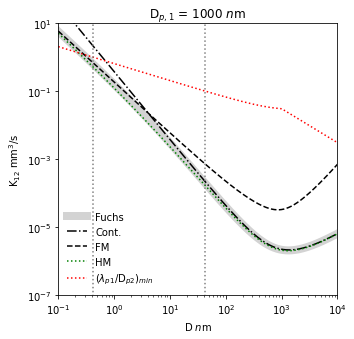

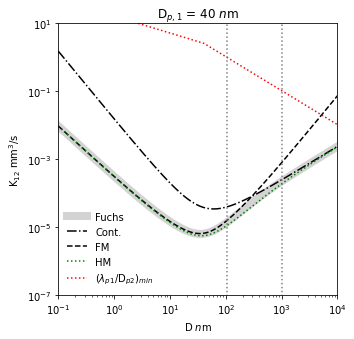

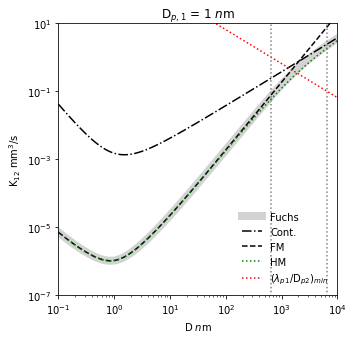

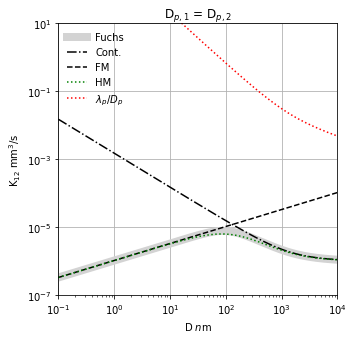

In [5]:
def K12(Dp1, Dp2):
    
    m1 = np.pi/6 * Dp1**3 * ρs
    m2 = np.pi/6 * Dp2**3 * ρs
    c1 = np.sqrt(8*kb*T/np.pi/m1)
    c2 = np.sqrt(8*kb*T/np.pi/m2)
    Kn1 = 2*λ/Dp1
    Kn2 = 2*λ/Dp2
    Cc1 = 1 + Kn1*(1.257 + 0.4*np.exp(-1.1/Kn1))
    Cc2 = 1 + Kn2*(1.257 + 0.4*np.exp(-1.1/Kn2))
    D1  = kb*T*Cc1/(3*np.pi*μ*Dp1)
    D2  = kb*T*Cc2/(3*np.pi*μ*Dp2)
    l1  = 8*D1/np.pi/c1
    l2  = 8*D2/np.pi/c2
    g1  = np.sqrt(2)/3/Dp1/l1*((Dp1+l1)**3 - (Dp1**2+l1**2)**1.5) - np.sqrt(2)*Dp1   # note, Seinfeld Table 13.1 is missing the second root 2, needed for Fig. 13.5
    g2  = np.sqrt(2)/3/Dp2/l2*((Dp2+l2)**3 - (Dp2**2+l2**2)**1.5) - np.sqrt(2)*Dp2   # with 1.0 instead of root 2 in both places, the max error in the D=D curve is 5%
    
    β = ((Dp1+Dp2)/(Dp1+Dp2+2*np.sqrt(g1**2+g2**2)) + 8*(D1+D2)/(Dp1+Dp2)/np.sqrt(c1**2+c2**2))**-1
    K12  = 2*np.pi*(D1+D2)*(Dp1+Dp2) * β
    K12c = 2*np.pi*(D1+D2)*(Dp1+Dp2)
    K12fm = np.pi/4*(Dp1 + Dp2)**2*np.sqrt(c1**2+c2**2)
    HM = K12c*K12fm/(K12c + K12fm)
    return K12*1E9, K12c*1E9, K12fm*1E9, HM*1E9, l1/Dp2, l2/Dp1
    
#################

Dp = np.logspace(-8, 3, 5000) * 1E-6

yy = np.empty(len(Dp))
yyc = np.empty(len(Dp))
yyfm = np.empty(len(Dp))
yyHM = np.empty(len(Dp))
Kpp = np.empty(len(Dp))

y1 = np.empty(len(Dp))
y1c = np.empty(len(Dp))
y1fm = np.empty(len(Dp))
HM1  = np.empty(len(Dp))

y04 = np.empty(len(Dp))
y04c = np.empty(len(Dp))
y04fm = np.empty(len(Dp))
HM04  = np.empty(len(Dp))

y001 = np.empty(len(Dp))
y001c = np.empty(len(Dp))
y001fm = np.empty(len(Dp))
HM001 = np.empty(len(Dp))

r1    = np.empty(len(Dp))
r2    = np.empty(len(Dp))
rr1   = np.empty(len(Dp))
rr04  = np.empty(len(Dp))
rr001 = np.empty(len(Dp))


for i in range(len(yy)):
    
    yy[i],yyc[i],yyfm[i],yyHM[i],dmb4,Kpp[i]    = K12(Dp[i], Dp[i])
    
    y1[i] , y1c[i] , y1fm[i], HM1[i], r1[i], r2[i] = K12(Dp[i], 1.001E-6)
    rr1[i] = np.min((r1[i], r2[i]))
    
    y04[i] , y04c[i] , y04fm[i], HM04[i], r1[i], r2[i] = K12(Dp[i], 0.040E-6)
    rr04[i] = np.min((r1[i], r2[i]))
    
    y001[i] , y001c[i] , y001fm[i], HM001[i], r1[i], r2[i] = K12(Dp[i], 0.001E-6)
    rr001[i] = np.min((r1[i], r2[i]))
    
ir1_1    = np.abs(rr1-1.0).argmin()
ir1_01   = np.abs(rr1-0.1).argmin()

ir04_1   = np.abs(rr04-1.0).argmin()
ir04_01  = np.abs(rr04-0.1).argmin()

ir001_1  = np.abs(rr001-1.0).argmin()
ir001_01 = np.abs(rr001-0.1).argmin()

#------------------

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(Dp*1E9, y1, '-', linewidth=8, color='lightgray')
plt.plot(Dp*1E9, y1c, 'k-.')
plt.plot(Dp*1E9, y1fm, 'k--')
plt.plot(Dp*1E9, HM1, 'g:')

plt.plot(Dp*1E9, rr1, 'r:')
plt.plot(np.array([Dp[ir1_1],  Dp[ir1_1]])*1E9,  [1E-12, 1E4], ':', color='gray')
plt.plot(np.array([Dp[ir1_01], Dp[ir1_01]])*1E9, [1E-12, 1E4], ':', color='gray')

plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-7, 1E1])
plt.xlim([1E-1, 1E4])

plt.xlabel(r'D $n$m')
plt.ylabel(r'K$_{12}$ mm$^3$/s')

plt.legend(['Fuchs', 'Cont.', 'FM', 'HM', r'($\lambda_{p1}$/D$_{p2}$)$_{min}$'], frameon=False)

plt.title(r'D$_{p,1}$ = 1000 $n$m');

#------------------

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(Dp*1E9, y04, '-', linewidth=8, color='lightgray')
plt.plot(Dp*1E9, y04c, 'k-.')
plt.plot(Dp*1E9, y04fm, 'k--')
plt.plot(Dp*1E9, HM04, 'g:')

plt.plot(Dp*1E9, rr04, 'r:')
plt.plot(np.array([Dp[ir04_1],  Dp[ir04_1]])*1E9,  [1E-12, 1E4], ':', color='gray')
plt.plot(np.array([Dp[ir04_01], Dp[ir04_01]])*1E9, [1E-12, 1E4], ':', color='gray')

plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-7, 1E1])
plt.xlim([1E-1, 1E4])

plt.xlabel(r'D $n$m')
plt.ylabel(r'K$_{12}$ mm$^3$/s')

plt.legend(['Fuchs', 'Cont.', 'FM', 'HM', r'($\lambda_{p1}$/D$_{p2}$)$_{min}$'], frameon=False)

plt.title(r'D$_{p,1}$ = 40 $n$m');

#------------------

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(Dp*1E9, y001, '-', linewidth=8, color='lightgray')
plt.plot(Dp*1E9, y001c, 'k-.')
plt.plot(Dp*1E9, y001fm, 'k--')
plt.plot(Dp*1E9, HM001, 'g:')

plt.plot(Dp*1E9, rr001, 'r:')
plt.plot(np.array([Dp[ir001_1],  Dp[ir001_1]])*1E9,  [1E-12, 1E4], ':', color='gray')
plt.plot(np.array([Dp[ir001_01], Dp[ir001_01]])*1E9, [1E-12, 1E4], ':', color='gray')

plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-7, 1E1])
plt.xlim([1E-1, 1E4]);

plt.xlabel(r'D $n$m')
plt.ylabel(r'K$_{12}$ mm$^3$/s')

plt.legend(['Fuchs', 'Cont.', 'FM', 'HM', r'($\lambda_{p1}$/D$_{p2}$)$_{min}$'], frameon=False)

plt.title(r'D$_{p,1}$ = 1 $n$m');

#------------------

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(Dp*1E9, yy, '-', linewidth=8, color='lightgray')
plt.plot(Dp*1E9, yyc, 'k-.')
plt.plot(Dp*1E9, yyfm, 'k--')
plt.plot(Dp*1E9, yyHM, 'g:')
plt.plot(Dp*1E9, Kpp, 'r:')

plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-7, 1E1])
plt.xlim([1E-1, 1E4]);

plt.xlabel(r'D $n$m')
plt.ylabel(r'K$_{12}$ mm$^3$/s')

plt.legend(['Fuchs', 'Cont.', 'FM', 'HM', r'$\lambda_p/D_p$'], frameon=False)
plt.title(r'D$_{p,1}$ = D$_{p,2}$');

plt.grid()
